Extração

In [19]:
import pandas as pd

# json_normalize was moved to the main pandas namespace
from pandas import json_normalize  

# Carregar o arquivo JSON
data = pd.read_json('TelecomX_Data.json') 


data_dict = data.to_dict(orient='records')


df = json_normalize(data_dict)


Transformação

In [20]:
# Visualizar as primeiras linhas do DataFrame
print(df.head())
print(df.info())

# Exibir os nomes das colunas e os tipos de dados
print(df.columns)  # Display all column names
print(df.dtypes)  # Show data types of each column

# Exibir estatísticas descritivas
print("\nEstatísticas descritivas:")
print(df.describe())

# Verificar valores nulos por coluna
print("\nValores nulos por coluna:")
print(df.isnull().sum())

# Verificar duplicatas
print("\nNúmero de linhas duplicadas:")
print(df.duplicated().sum())



   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... 

In [21]:
import numpy as np

# Verificar se há valores nulos na coluna 'Churn'
if df['Churn'].isnull().sum() > 0:
    # Calcular a frequência de cada valor (0 e 1)
    churn_distribution = df['Churn'].value_counts(normalize=True)
    print("\nDistribuição de valores em 'Churn':")
    print(churn_distribution)

    # Preencher valores nulos com base na frequência
    df['Churn'] = df['Churn'].apply(
        lambda x: np.random.choice([0, 1], p=churn_distribution) if pd.isnull(x) else x
    )
    print("\nValores nulos preenchidos com base na frequência.")
else:
    print("\nNão há valores nulos na coluna 'Churn'.")


Não há valores nulos na coluna 'Churn'.


In [22]:
import numpy as np

# Substituir strings vazias por NaN para facilitar o tratamento
df['Churn'] = df['Churn'].replace('', np.nan)

# Calcular a distribuição de frequência
churn_distribution = df['Churn'].value_counts(normalize=True)
print("\nDistribuição de valores em 'Churn':")
print(churn_distribution)

# Preencher valores ausentes com base na frequência
df['Churn'] = df['Churn'].apply(
    lambda x: np.random.choice(['No', 'Yes'], p=churn_distribution) if pd.isnull(x) else x
)


Distribuição de valores em 'Churn':
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [23]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [24]:
# Verificar valores únicos na coluna 'Churn'
print(df['Churn'].unique())
print(df['Churn'].value_counts(dropna=False))
print(df['Churn'].isnull().sum())

[0 1]
Churn
0    5338
1    1929
Name: count, dtype: int64
0


In [25]:
# Verificar se a coluna 'MonthlyCharges' existe no DataFrame
if 'account.Charges.Monthly' in df.columns:
    # Criar a coluna 'Contas_Diarias' dividindo o faturamento mensal por 30
    df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30
    print("\nColuna 'Contas_Diarias' criada com sucesso!")
else:
    print("\nA coluna 'account.Charges.Monthly' não está presente no DataFrame.")
    
# Exibir as primeiras linhas para verificar a nova coluna
print("\nPrimeiras linhas do DataFrame com 'Contas_Diarias':")
print(df[['account.Charges.Monthly', 'Contas_Diarias']].head())


Coluna 'Contas_Diarias' criada com sucesso!

Primeiras linhas do DataFrame com 'Contas_Diarias':
   account.Charges.Monthly  Contas_Diarias
0                     65.6        2.186667
1                     59.9        1.996667
2                     73.9        2.463333
3                     98.0        3.266667
4                     83.9        2.796667


In [26]:
# Renomear colunas
df.rename(columns={
    'account.Charges.Monthly': 'MonthlyCharges',
    'account.Charges.Total': 'TotalCharges',
    'customer.ID': 'CustomerID'
}, inplace=True)
print("\nColunas renomeadas para maior clareza.")


Colunas renomeadas para maior clareza.


In [27]:
# Padronizar valores categóricos
categorical_columns = ['InternetService', 'Contract', 'PaymentMethod']
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].str.strip().str.lower()
        print(f"\nValores da coluna '{col}' padronizados.")

Carga e Análise

In [28]:
# Converter a coluna 'TotalCharges' para numérico
if 'TotalCharges' in df.columns:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    print("\nColuna 'TotalCharges' convertida para numérico.")

    # Tratar valores ausentes (NaN) após a conversão
    df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())
    print("\nValores ausentes na coluna 'TotalCharges' preenchidos com a média.")

# Análise descritiva geral
print("\nEstatísticas descritivas gerais:")
print(df.describe())

# Calcular métricas específicas para colunas numéricas
if 'MonthlyCharges' in df.columns:
    print("\nAnálise descritiva para 'MonthlyCharges':")
    print(f"Média: {df['MonthlyCharges'].mean()}")
    print(f"Mediana: {df['MonthlyCharges'].median()}")
    print(f"Desvio Padrão: {df['MonthlyCharges'].std()}")
    print(f"Valor Mínimo: {df['MonthlyCharges'].min()}")
    print(f"Valor Máximo: {df['MonthlyCharges'].max()}")

if 'TotalCharges' in df.columns:
    print("\nAnálise descritiva para 'TotalCharges':")
    print(f"Média: {df['TotalCharges'].mean()}")
    print(f"Mediana: {df['TotalCharges'].median()}")
    print(f"Desvio Padrão: {df['TotalCharges'].std()}")
    print(f"Valor Mínimo: {df['TotalCharges'].min()}")
    print(f"Valor Máximo: {df['TotalCharges'].max()}")

if 'tenure' in df.columns:
    print("\nAnálise descritiva para 'tenure':")
    print(f"Média: {df['tenure'].mean()}")
    print(f"Mediana: {df['tenure'].median()}")
    print(f"Desvio Padrão: {df['tenure'].std()}")
    print(f"Valor Mínimo: {df['tenure'].min()}")
    print(f"Valor Máximo: {df['tenure'].max()}")


Coluna 'TotalCharges' convertida para numérico.

Valores ausentes na coluna 'TotalCharges' preenchidos com a média.

Estatísticas descritivas gerais:
             Churn  customer.SeniorCitizen  customer.tenure  MonthlyCharges  \
count  7267.000000             7267.000000      7267.000000     7267.000000   
mean      0.265447                0.162653        32.346498       64.720098   
std       0.441601                0.369074        24.571773       30.129572   
min       0.000000                0.000000         0.000000       18.250000   
25%       0.000000                0.000000         9.000000       35.425000   
50%       0.000000                0.000000        29.000000       70.300000   
75%       1.000000                0.000000        55.000000       89.875000   
max       1.000000                1.000000        72.000000      118.750000   

       TotalCharges  Contas_Diarias  
count   7267.000000     7267.000000  
mean    2280.634213        2.157337  
std     2266.915104    

C:\Users\dbcbr\AppData\Local\Temp\ipykernel_12032\1772620336.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='viridis')


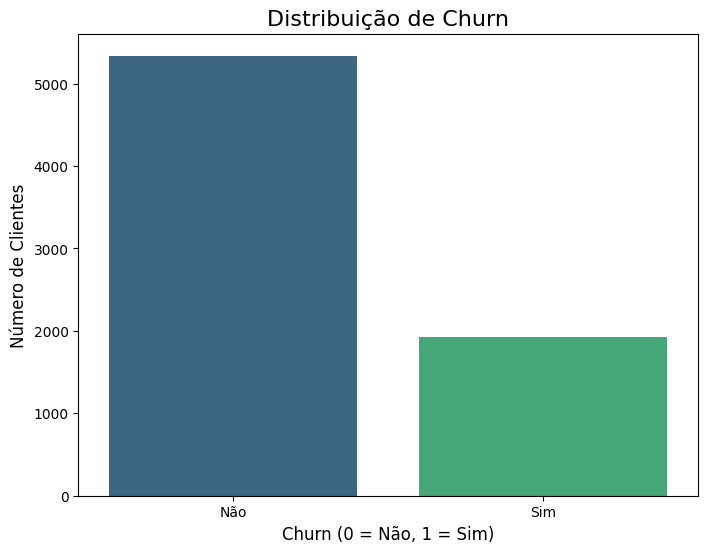

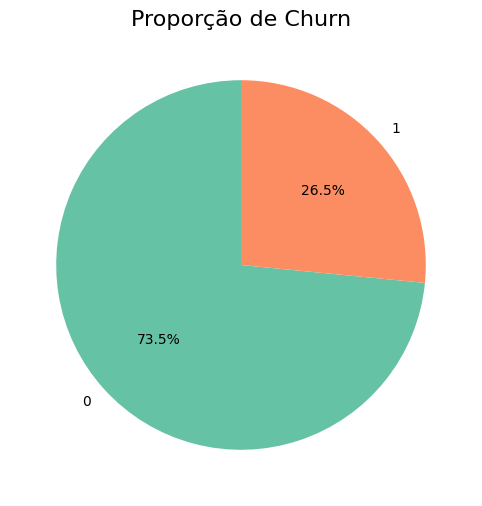

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar se a coluna 'Churn' existe no DataFrame
if 'Churn' in df.columns:
    # Contar a frequência de cada valor em 'Churn'
    churn_counts = df['Churn'].value_counts()

    # Gráfico de barras
    plt.figure(figsize=(8, 6))
    sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='viridis')
    plt.title('Distribuição de Churn', fontsize=16)
    plt.xlabel('Churn (0 = Não, 1 = Sim)', fontsize=12)
    plt.ylabel('Número de Clientes', fontsize=12)
    plt.xticks([0, 1], ['Não', 'Sim'])
    plt.show()

    # Gráfico de pizza
    plt.figure(figsize=(8, 6))
    plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
    plt.title('Proporção de Churn', fontsize=16)
    plt.show()
else:
    print("A coluna 'Churn' não está presente no DataFrame.")

In [30]:
print(df.columns)

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Contas_Diarias'],
      dtype='object')


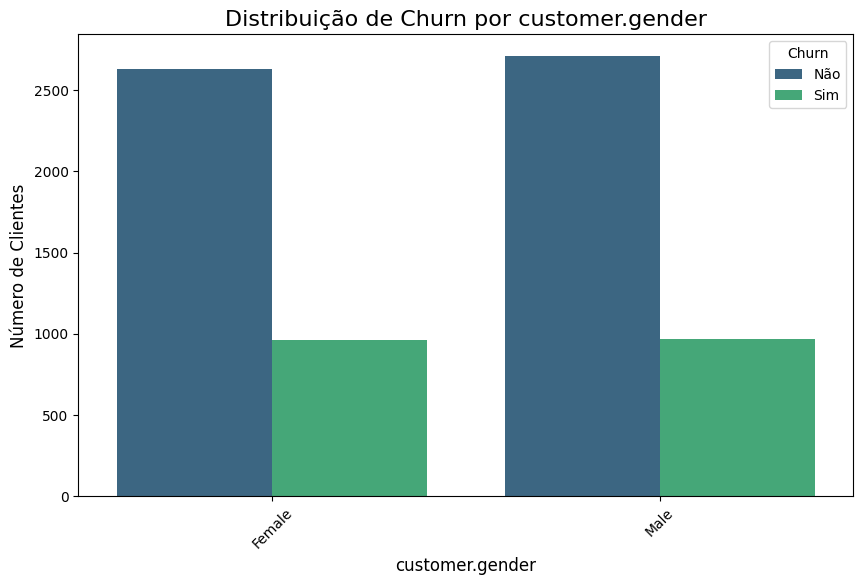

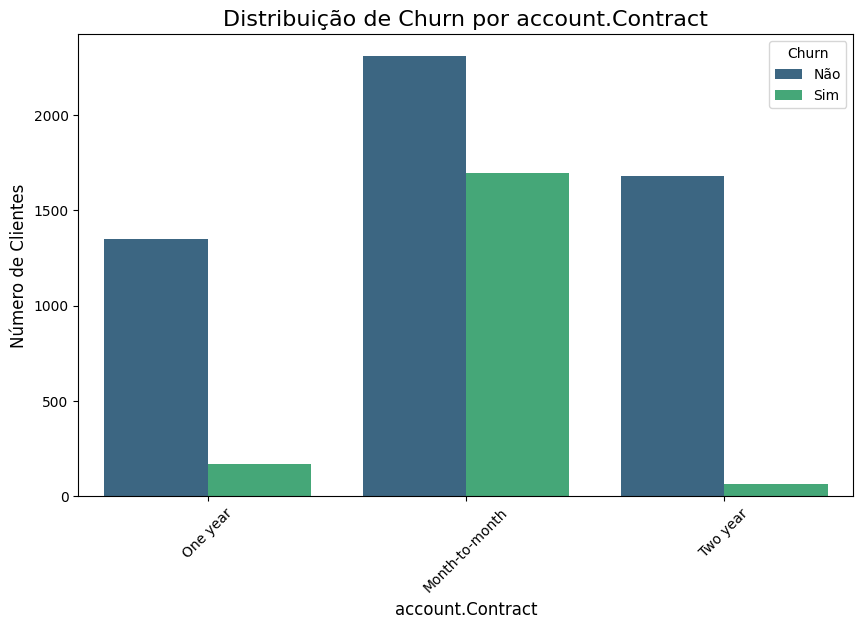

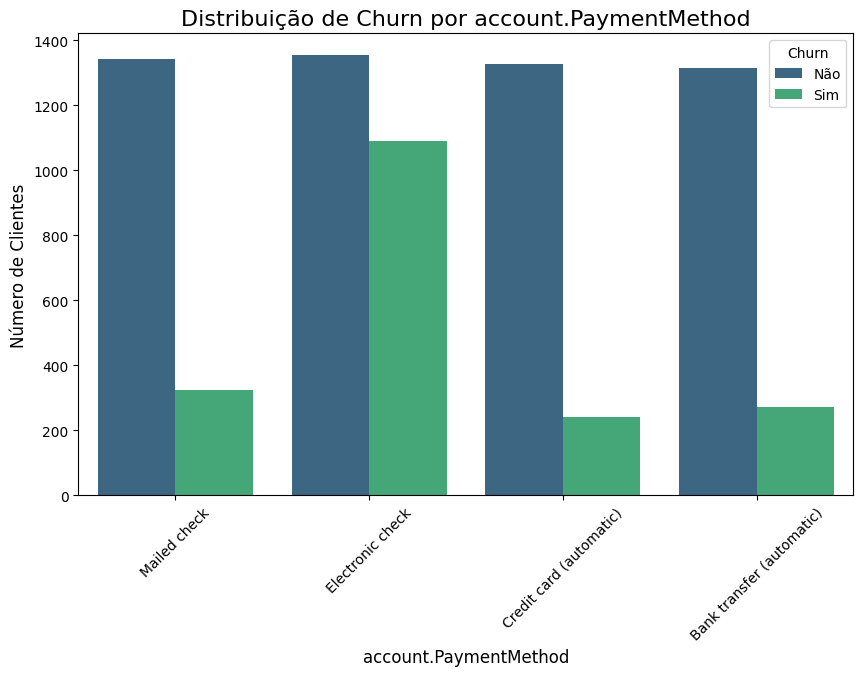

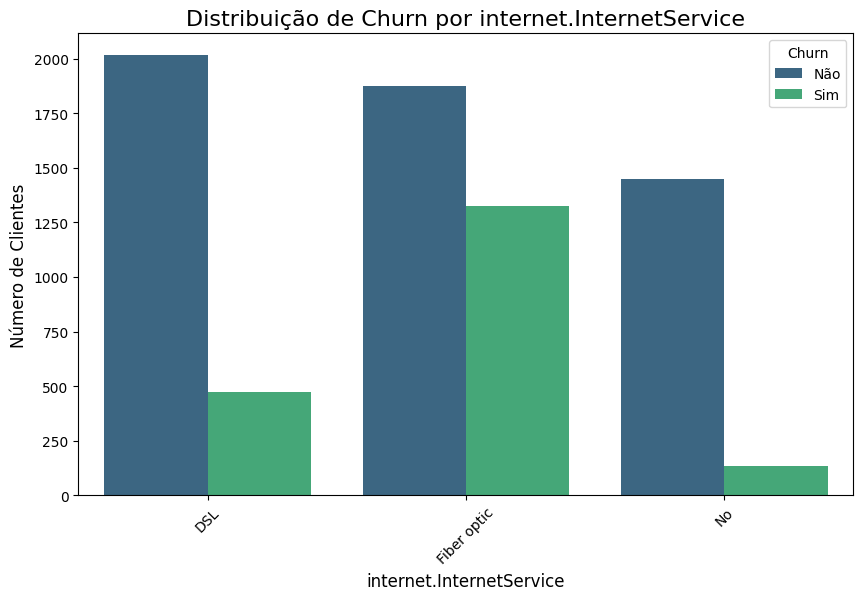

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variáveis categóricas para análise
categorical_columns = ['customer.gender', 'account.Contract', 'account.PaymentMethod', 'internet.InternetService']

# Verificar se as colunas categóricas existem no DataFrame
for col in categorical_columns:
    if col in df.columns:
        plt.figure(figsize=(10, 6))
        
        # Criar gráfico de barras agrupado
        sns.countplot(data=df, x=col, hue='Churn', palette='viridis')
        
        # Configurações do gráfico
        plt.title(f'Distribuição de Churn por {col}', fontsize=16)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Número de Clientes', fontsize=12)
        plt.legend(title='Churn', labels=['Não', 'Sim'])
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"A coluna '{col}' não está presente no DataFrame.")

C:\Users\dbcbr\AppData\Local\Temp\ipykernel_12032\2302835734.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='viridis')


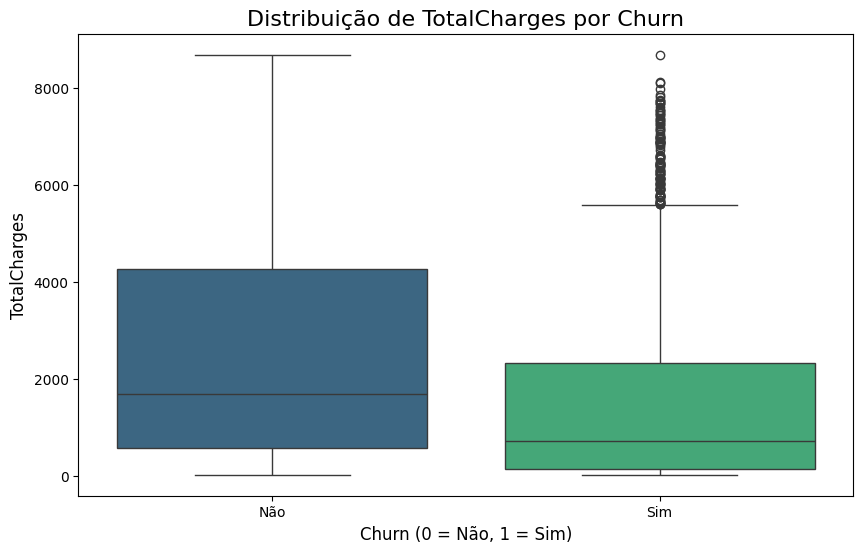

A coluna 'tenure' não está presente no DataFrame.


C:\Users\dbcbr\AppData\Local\Temp\ipykernel_12032\2302835734.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='viridis')


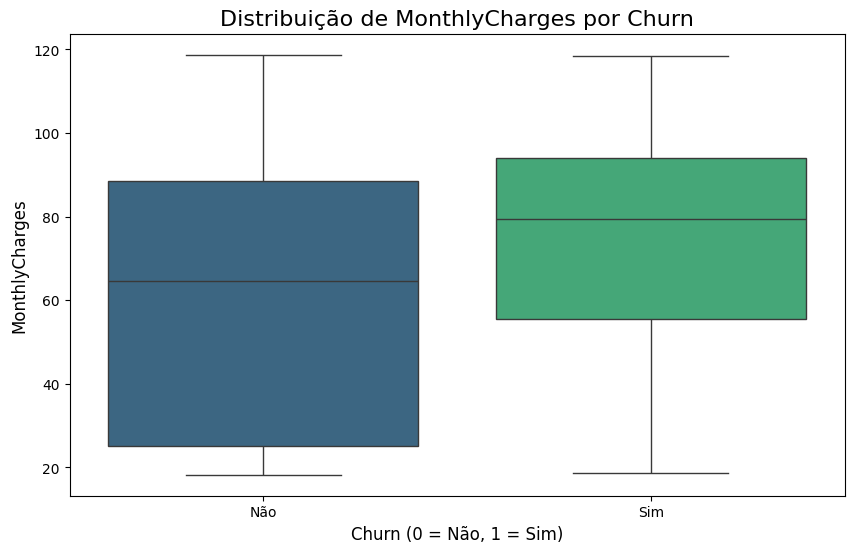

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variáveis numéricas para análise
numeric_columns = ['TotalCharges', 'tenure', 'MonthlyCharges']

# Verificar se as colunas numéricas existem no DataFrame
for col in numeric_columns:
    if col in df.columns:
        plt.figure(figsize=(10, 6))
        
        # Criar boxplot para comparar a distribuição
        sns.boxplot(data=df, x='Churn', y=col, palette='viridis')
        
        # Configurações do gráfico
        plt.title(f'Distribuição de {col} por Churn', fontsize=16)
        plt.xlabel('Churn (0 = Não, 1 = Sim)', fontsize=12)
        plt.ylabel(col, fontsize=12)
        plt.xticks([0, 1], ['Não', 'Sim'])
        plt.show()
    else:
        print(f"A coluna '{col}' não está presente no DataFrame.")

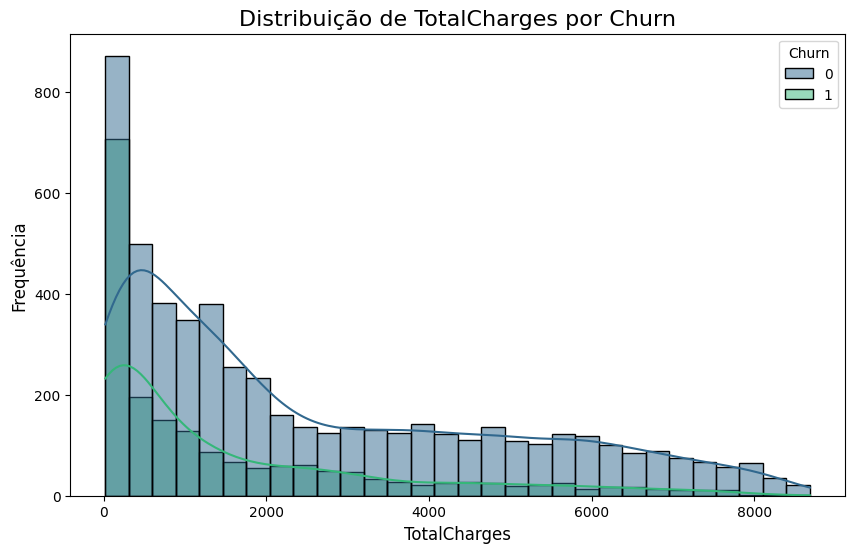

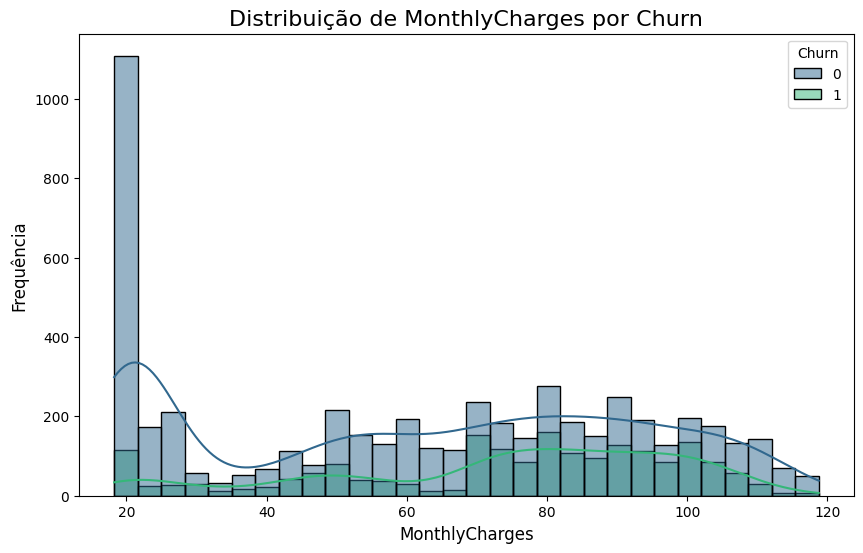

In [33]:
for col in numeric_columns:
    if col in df.columns:
        plt.figure(figsize=(10, 6))
        
        # Criar histograma para comparar as distribuições
        sns.histplot(data=df, x=col, hue='Churn', kde=True, palette='viridis', bins=30)
        
        # Configurações do gráfico
        plt.title(f'Distribuição de {col} por Churn', fontsize=16)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Frequência', fontsize=12)
        plt.show()

Relatório Final

1. Introdução
O objetivo desta análise é entender os fatores que influenciam a evasão de clientes (Churn) em uma empresa de telecomunicações. A evasão de clientes é um problema crítico, pois impacta diretamente a receita e a sustentabilidade do negócio. A análise busca identificar padrões e características associadas aos clientes que cancelaram o serviço, fornecendo insights para estratégias de retenção.


2. Limpeza e Tratamento de Dados
Os seguintes passos foram realizados para garantir a qualidade dos dados:

Importação dos dados: Os dados foram carregados a partir de um arquivo JSON.
Tratamento de valores ausentes:
Valores nulos na coluna Churn foram preenchidos com base na frequência dos valores existentes.
Valores ausentes em colunas numéricas, como TotalCharges, foram preenchidos com a média.
Padronização de colunas categóricas: Valores categóricos foram convertidos para letras minúsculas e espaços em branco foram removidos.
Conversão de colunas: A coluna Churn foi convertida para valores binários (0 para "Não" e 1 para "Sim").
Renomeação de colunas: Colunas foram renomeadas para facilitar a leitura e análise.

3. Análise Exploratória de Dados
3.1 Distribuição de Churn
A maioria dos clientes não cancelou o serviço (Churn = 0), enquanto uma proporção menor cancelou (Churn = 1).
Gráficos de barras e pizza foram usados para visualizar a proporção de churn.
3.2 Análise por Variáveis Categóricas
Gênero: A taxa de churn foi semelhante entre homens e mulheres, indicando que o gênero não é um fator determinante.
Tipo de Contrato: Clientes com contratos mensais apresentaram maior taxa de churn em comparação com contratos anuais ou bienais.
Método de Pagamento: Clientes que utilizam pagamento eletrônico (e-check) tiveram maior taxa de churn.
Serviço de Internet: Clientes sem serviço de internet apresentaram menor taxa de churn.
3.3 Análise por Variáveis Numéricas
TotalCharges (Total Gasto): Clientes com menor gasto total apresentaram maior taxa de churn.
Tenure (Tempo de Contrato): Clientes com menor tempo de contrato apresentaram maior taxa de churn.
MonthlyCharges (Cobrança Mensal): Clientes com cobranças mensais mais altas apresentaram maior taxa de churn.

4. Conclusões e Insights
Com base na análise, os seguintes insights foram identificados:

Contratos mensais estão associados a uma maior taxa de churn. Isso pode ser devido à flexibilidade de cancelamento.
Métodos de pagamento eletrônico (e-check) têm maior taxa de churn, sugerindo que esses clientes podem ter menos fidelidade.
Clientes com menor tempo de contrato (tenure) são mais propensos a cancelar, indicando a importância de estratégias de retenção para novos clientes.
Clientes com cobranças mensais mais altas têm maior probabilidade de churn, o que pode indicar insatisfação com o custo-benefício.

5. Recomendações
Com base nos insights, as seguintes ações são recomendadas para reduzir a evasão de clientes:

Incentivar contratos de longo prazo: Oferecer descontos ou benefícios para clientes que optarem por contratos anuais ou bienais.
Melhorar a experiência de pagamento: Investigar por que clientes que utilizam e-check têm maior taxa de churn e oferecer alternativas mais convenientes.
Programas de fidelidade para novos clientes: Implementar programas de retenção para clientes com menor tempo de contrato, como descontos nos primeiros meses.
Analisar clientes com cobranças altas: Identificar se os clientes com cobranças mensais mais altas estão insatisfeitos com o serviço e oferecer planos personalizados.

C:\Users\dbcbr\AppData\Local\Temp\ipykernel_12032\822094103.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='TotalCharges', palette='viridis')


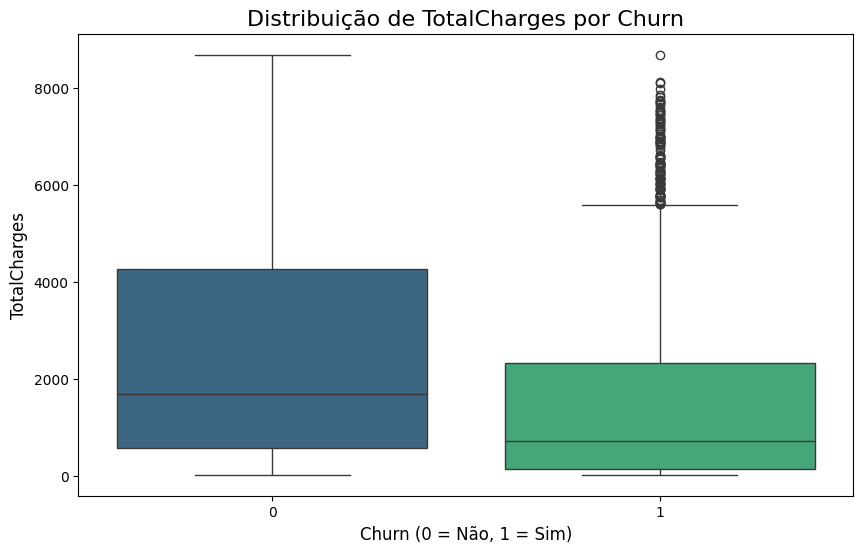

In [34]:
# Exemplo de gráfico para incluir no relatório
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='TotalCharges', palette='viridis')
plt.title('Distribuição de TotalCharges por Churn', fontsize=16)
plt.xlabel('Churn (0 = Não, 1 = Sim)', fontsize=12)
plt.ylabel('TotalCharges', fontsize=12)
plt.show()

In [35]:
# Função para salvar o DataFrame como CSV
def save_data_to_csv(df, file_path):
    """
    Salva o DataFrame em um arquivo CSV.

    Args:
        df: DataFrame do Pandas a ser salvo.
        file_path: Caminho para o arquivo CSV de saída.
    """
    try:
        df.to_csv(file_path, index=False, encoding='utf-8')
        print(f"Arquivo salvo com sucesso em: {file_path}")
    except Exception as e:
        print(f"Ocorreu um erro ao salvar o arquivo: {e}")

# Chamar a função para salvar o DataFrame
output_file = 'c:\\Users\\dbcbr\\OneDrive\\Documentos\\GitHub\\Challenge-ONE---Telecom-X\\TelecomX_Data_Processed.csv'
save_data_to_csv(df, output_file)

Arquivo salvo com sucesso em: c:\Users\dbcbr\OneDrive\Documentos\GitHub\Challenge-ONE---Telecom-X\TelecomX_Data_Processed.csv


In [37]:
# Selecionar apenas colunas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Calcular a matriz de correlação
correlation_matrix = numeric_df.corr()

# Exibir a correlação da variável 'Churn' com outras variáveis
print("\nCorrelação com a variável 'Churn':")
print(correlation_matrix['Churn'].sort_values(ascending=False))


Correlação com a variável 'Churn':
Churn                     1.000000
Contas_Diarias            0.184954
MonthlyCharges            0.184954
customer.SeniorCitizen    0.144601
TotalCharges             -0.197380
customer.tenure          -0.344336
Name: Churn, dtype: float64


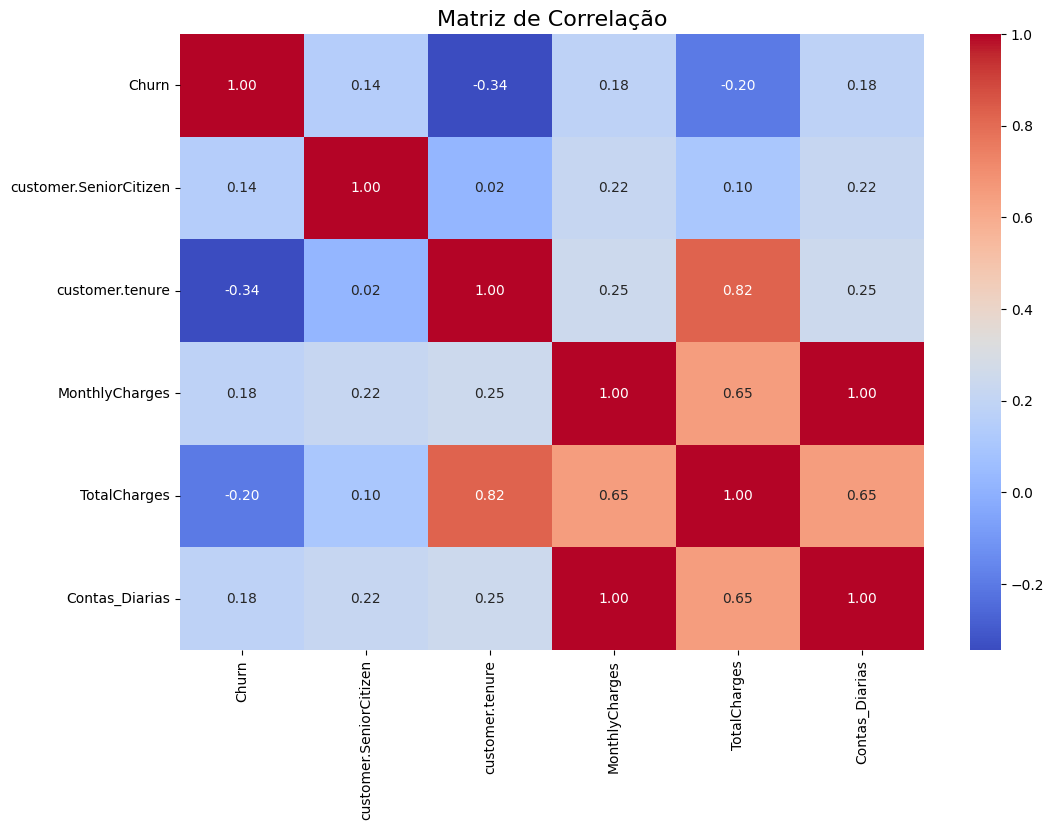

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar um heatmap para a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlação', fontsize=16)
plt.show()

C:\Users\dbcbr\AppData\Local\Temp\ipykernel_12032\4108282483.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Contas_Diarias', y='Churn', alpha=0.6, palette='viridis')


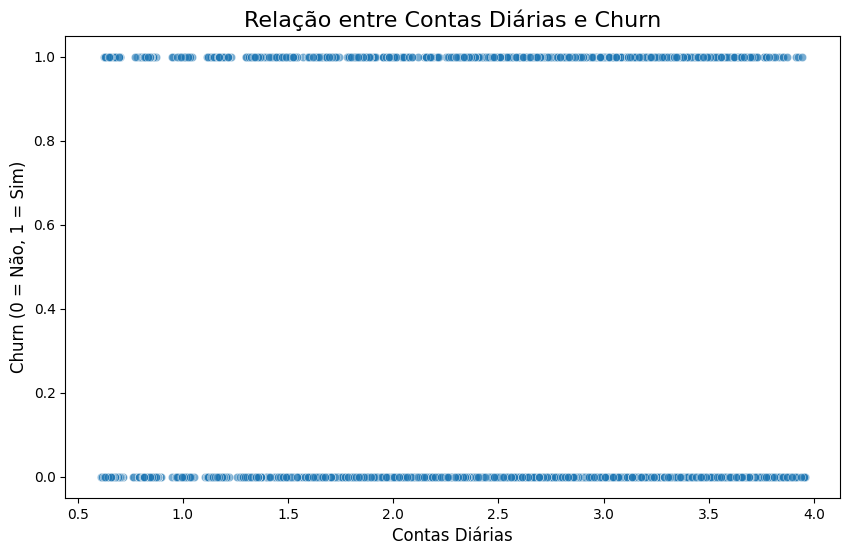

In [39]:
# Gráfico de dispersão para Contas_Diarias e Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Contas_Diarias', y='Churn', alpha=0.6, palette='viridis')
plt.title('Relação entre Contas Diárias e Churn', fontsize=16)
plt.xlabel('Contas Diárias', fontsize=12)
plt.ylabel('Churn (0 = Não, 1 = Sim)', fontsize=12)
plt.show()

C:\Users\dbcbr\AppData\Local\Temp\ipykernel_12032\2584963761.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='customer.tenure', y='Churn', alpha=0.6, palette='viridis')


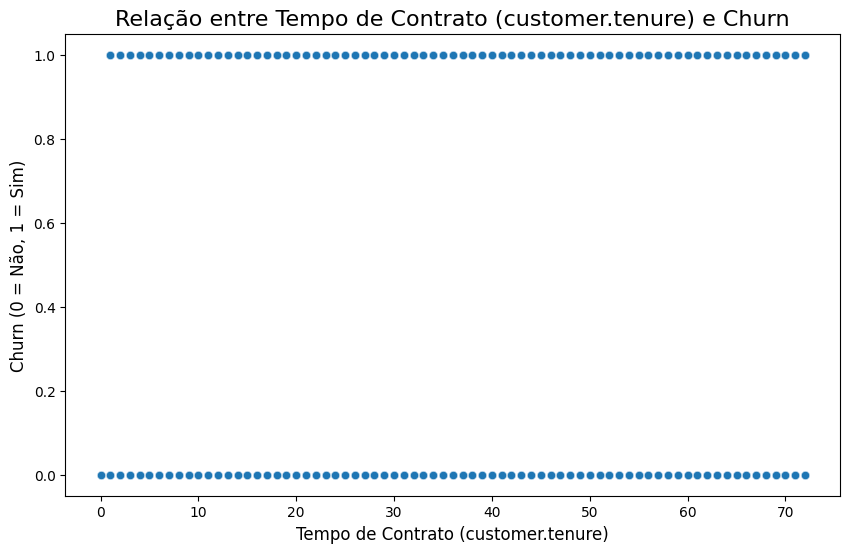

In [41]:
# Gráfico de dispersão para tenure e Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='customer.tenure', y='Churn', alpha=0.6, palette='viridis')
plt.title('Relação entre Tempo de Contrato (customer.tenure) e Churn', fontsize=16)
plt.xlabel('Tempo de Contrato (customer.tenure)', fontsize=12)
plt.ylabel('Churn (0 = Não, 1 = Sim)', fontsize=12)
plt.show()